# Introduction to Programming with Python

# Unit 5: Nested Loops

Let us start with revisiting the exercise from the last unit. We needed to:

1. Write a function `fact` that will calculate a factorial $n!=1\cdot2\cdot\dots\cdot n$
2. Print a table of factorials from 1 to 7

Let's start with a function:

In [2]:
def fact(n):
    acc = 1
    for i in range(2,n+1):
        acc = acc*i
    return acc

fact(7)

5040

Here we are using a special technique: we introduce a variable called **accumulator**, which initially takes the value 1, and then it is multiplied in turn by 2, 3, and so on, up to $n$. It happens inside a loop. When the loop is done - we return the value of accumulator, which is equal to the factorial.

The number which changes from 2 to $n$ inside a loop is called a **loop counter**. It is the variable that is used in the `for` expression, when we are saying `for i in ...`. Very often programmers call those variables `i`, `j`, `k` and so on, but it is just a tradition. Most probably, it is because `i` stands for **index**, or for **integer** (and loop counters are often integers).

An important thing to note here is that in our case we need the value of loop counter to change from 2 to $n$. If we write for loop in this way:

```python
for i in range(n):
    ...
```
then `i` will change from 0 to $n-1$, and the loop will repeat $n$ times. In our case, we want the values of `i` to start at 2, and end with the value $n$ inclusive, so we need to write a loop like this:

```python
for i in range(2,n+1):
    ...
```

Important things to remember:

* First argument of `range` specifies the starting value of the counter. If the argument is missing - it defaults to 0
* Second argument of `range` specifies when we need to end the loop, and loop is over just before the counter reaches specified value. So it is essentially the last conter value plus 1

Now, to print the table of factorial values, we use another loop:

In [5]:
for i in range(1,8):
    print(f'{i}! = {fact(i)}')

1! = 1
2! = 2
3! = 6
4! = 24
5! = 120
6! = 720
7! = 5040


Notice how elegantly we use the string interpolation here, putting the expression `fact(i)` right inside the curly braces inside the string. We do not even need to use an additional variable here!

## Nested Loops

In our case, to print the table we used a loop from 1 to 7, and inside it to calculate the factorial another loop was used inside the function `fact`. If we were to write everything inside one big piece of code, we would write something like this:

In [7]:
for i in range(1,8):
    acc = 1
    for j in range(2,i+1):
        acc *= j
    print(f'{i}! = {acc}')

1! = 1
2! = 2
3! = 6
4! = 24
5! = 120
6! = 720
7! = 5040


When we have a loop inside another loop, we call it **nested loops**. Two important things are worth noticing here:

* We need to use different names to name counter variables in nested loops. In our case, we use `i` as the counter of **outer loop**, and `j` as counter of **inner loop**.
* The counter of outer loop can be used inside the range expression in the inner loop.

We also introduce another operation here, `*=`, which is very useful whenever we are dealing with an accumulator. The expression `acc *= j` in our program is equivalent to `acc = acc * j`, but it is shorter, and is still quite clear in terms of meaning.

## Drawing a Rectangular City

In the previous unit, we have learnt how to draw a streen of several houses. Now it's time to use the notion of nested loops to draw a rectangular city with a number of streets! What we need to keep in mind is that after drawing one street we need to move the turtle back to the beginning of a street, and down. We will also define the configuration of a city (number of rows and columns) in variables in our code - it is always a good idea to do so, to make code more customizable.

In [1]:
import jturtle as turtle

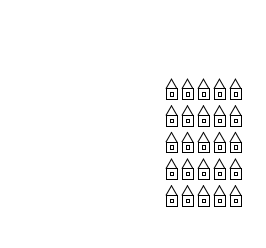

In [2]:
rows = 5 # number of rows (streets)
cols = 5 # number of columns (houses in a street)
sep = 5 # separation between houses
w = 10 # house size

from pycourse import house, square
        
for _ in range(rows):
    # draw one street
    for _ in range(cols):
        house(w) # draw a house
        # move turtle to the next house
        turtle.penup()
        turtle.right(90)
        turtle.forward(w+sep)
        turtle.left(90)
        turtle.pendown()
    # move turtle to the beginning of a street
    turtle.left(90)
    turtle.penup()
    turtle.forward(cols*(w+sep)) # width of the whole street
    turtle.right(90)
    turtle.backward(2*w+sep)
    turtle.pendown()
        
turtle.done()

Please note that we are using comments `#` quite extensively, to help you understand what goes on inside the code. Comments help other people as well as yourself after few weeks to understand the code.

Another useful trick that we are using here is called **anonymous variable** `_`. If we do not care about the value of a loop counter, we can use underscore instead of a variable name, which means *we do not care about the value*. It help people who read the code to understant that variable value is not important, and also saves you the effort of having to come up with new loop counter name each time inside nested loops.

## Nested Loops vs. One Loop

It is possible to rewrite the same logic using one big loop instead of two nested loops. In our case, whenever we encounter a street end, we need to return the turtle to the beginning of the street and move it down. Suppose the variable `i` denotes the loop counter, i.e. house number, in which case the end of the street is encountered when this number is divisible by `cols`, i.e. the remainder of `i` divided by `cols` is 0. 

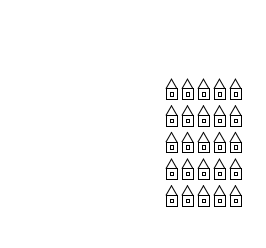

In [25]:
for i in range(1,rows*cols+1):
    house(w) # draw a house
    # move turtle to the next house
    turtle.penup()
    turtle.right(90)
    turtle.forward(w+sep)
    turtle.left(90)
    turtle.pendown()
    if i%cols == 0: # end-of-street encountered
        # move turtle to the beginning of a street
        turtle.left(90)
        turtle.penup()
        turtle.forward(cols*(w+sep)) # width of the whole street
        turtle.right(90)
        turtle.backward(2*w+sep)
        turtle.pendown()
        
turtle.done()

This example shows us that it is always possible to write the same program in many different ways. And there are often different criteria to determine which way is better:

* **code clarity** - it is always better to have a clear and readable code, because it is easier to write and maintain
* **program efficiency** - sometimes simpler or shorter code does not mean better performance, so we need to take performance considerations into account

Ofter we end up having to compromise between simplicity and performance. 

## Sierpiński Triangle

Now that we know loops, let me show you a very beautiful example of how a simple computer program can generate infinite complexity and beauty. We will learn how to draw so-called [**Sierpiński Triangle**](https://en.wikipedia.org/wiki/Sierpiński_triangle) - a fractal structure that looks like this:

<img src="images/Sierpinski_triangle.png" width="30%"/>

([photo](https://commons.wikimedia.org/w/index.php?curid=8862246) from [Wikipedia](https://en.wikipedia.org/wiki/Sierpiński_triangle) by Beojan Stanislaus, CC BY-SA 3.0)

This figure is surprisingly easy to draw! We need to implement the following algorithm:

1. Select three vertices of a triangle, $(x_1,y_1)$, $(x_2,y_2)$ and $(x_3,y_3)$.
2. Set coordinates of current point $(x,y)$ to some initial value.
3. Randomly pick one of the vertices $i\in\{1,2,3\}$
4. Calculate new point coordinates as *midpoint* between current point and selected vertice: 
$$x \leftarrow \frac{x_i+x}{2}$$
$$y \leftarrow \frac{y_i+x}{2}$$
5. Draw a point at coordinates $(x,y)$
6. Repeat from step 3

This process sounds like a loop than never ends, or so-called **infinite loop**. In practice, we definitely want our program to stop at some point, so we just program sufficiently large for-loop.

To begin with, let's define the list of triangle vertices as a list of coordinate pairs. We have not discussed yet what lists are, but for now please consider it just a collection of pairs, from which we would be able to pick one pair using `random.choice` function which we have seen before:

In [16]:
vertices = [(0,00),(100,0),(50,100)]

Now let's program the main loop. Here we use coordinate-based graphics and `turtle.point` to draw the dot, and to make the dot smaller we specify additional parameter, `pointstyle`. Please note that this loop can take a moment to execute!

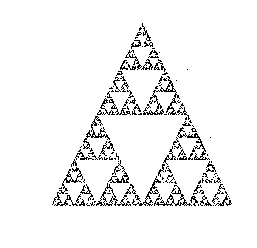

In [17]:
import random

x,y = 150,150
for _ in range(3000):
    vx, vy = random.choice(vertices)
    x = (x+vx)/2
    y = (y+vy)/2
    turtle.point((x,y),pointstyle=',')
turtle.done()

Isn't this picture beautiful?! I find it very fascinating that we can achieve potentially infinite complexity with quite a short code.

While the figure is beautiful, our code can still be improved. In our code we think in terms of individual coordinates $x$ and $y$, while we can switch to higher level thinking, and keep in mind the points, and not coordinates. 

To do that, let's first define a function `midpoint` to calculate the position of middle point between points `a` and `b`. Let me remind you that if `a` denotes a pair of point coordinates, then `a[0]` denotes the first coordinate ($x$), and `a[1]` -- second coordinate ($y$).

Using this function, the code becomes a lot cleaner:

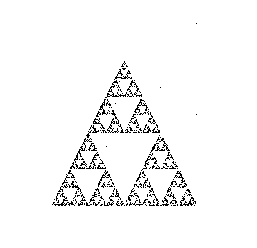

In [19]:
def midpoint(a,b):
    return ((a[0]+b[0])/2,(a[1]+b[1])/2)

p = 150,150
for _ in range(3000):
    v = random.choice(vertices)
    p = midpoint(p,v)
    turtle.point(p, pointstyle=',')
turtle.done()

## Exercise: Polygons

Coming back to our original topic of nested loops, please do the following exercise:
1. Define a function `poly` that will draw a polygon with a given number of sides (and a given size). You most probably want to use turtle graphics for this!
2. Draw three polygons with number of sides of 3 (triangle), 5 and 7. You should end up with a picture like this:

![Polygons](images/PolygonTask.PNG)